Trains a neural network model to classify images of clothing, like sneakers and shirts. We use tf.keras, a high-level API to build and train models in TensorFlow.

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.15.0


We use the Fashion MNIST dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels). Here, 60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images. The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The labels are an array of integers, ranging from 0 to 9. 

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

# The train_images and train_labels arrays are the training set—the data the model uses to learn
# The model is tested against the test set, the test_images, and test_labels arrays
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
# Each image is mapped to a single label
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
# there are 60,000 images in the training set, with each image represented as 28 x 28 pixels
train_images.shape

(60000, 28, 28)

In [5]:
# there are 60,000 labels in the training set
len(train_labels)

60000

In [6]:
# Each label is an integer between 0 and 9
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
# There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels
test_images.shape

(10000, 28, 28)

In [8]:
# the test set contains 10,000 images labels
len(test_labels)

10000

# **Preprocess the data**

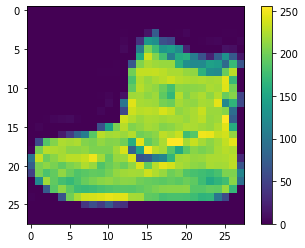

In [9]:
# The data must be preprocessed before training the network
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
# Scale these values to a range of 0 to 1 before feeding them to the neural network model. 
# To do so, divide the values by 255.
train_images = train_images / 255.0
test_images = test_images / 255.0

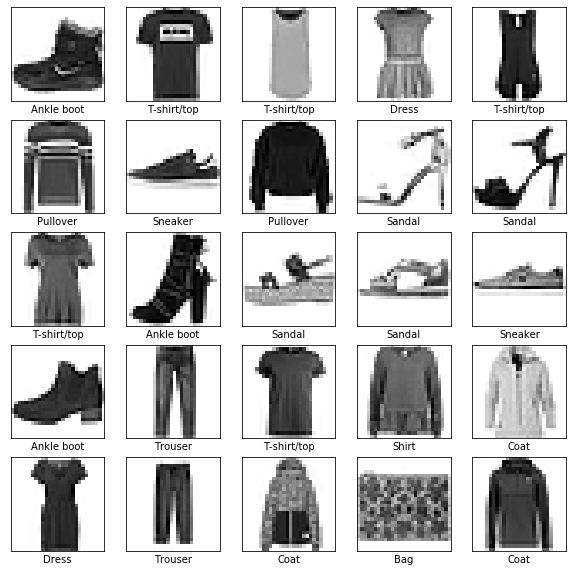

In [11]:
# To verify that the data is in the correct format
# display the first 25 images from the training set and display the class name below each image
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# **Build the model**
Building the neural network requires configuring the layers of the model, then compiling the model.

The basic building block of a neural network is the layer. Layers extract representations from the data fed into them.

Most of deep learning consists of chaining together simple layers.

Most layers, such as tf.keras.layers.Dense, have parameters that are learned during training.

In [12]:
model = keras.Sequential([
    # The first layer in this network, tf.keras.layers.Flatten, transforms the format of the images 
    # from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). 
    # This layer has no parameters to learn; it only reformats the data.
    keras.layers.Flatten(input_shape=(28, 28)),

    # After the pixels are flattened, the network consists of a sequence of two tf.keras.layers.Dense layers. 
    # These are densely connected, or fully connected, neural layers.
    # The first Dense layer has 128 nodes (or neurons). 
    keras.layers.Dense(128, activation='relu'),
    # The second (last) layer is a 10-node softmax layer that returns an array of 10 probability scores that sum to 1. 
    keras.layers.Dense(10, activation='softmax')
    # Each node contains a score that indicates the probability that the current image belongs to one of the 10 classes.
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


## Compile the model
- Loss function — This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.

- Optimizer — This is how the model is updated based on the data it sees and its loss function.

- Metrics — Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Train the neural network model
1. Feed the training data to the model. In this example, the training data is in the train_images and train_labels arrays.

2. The model learns to associate images and labels.

3. You ask the model to make predictions about a test set—in this example, the test_images array. Verify that the predictions match the labels from the test_labels array.

In [14]:
# To start training, call the model.fit method — so called because it "fits" the model to the training data
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.5083 - acc: 0.8224
Epoch 2/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.3791 - acc: 0.8633
Epoch 3/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.3406 - acc: 0.8743
Epoch 4/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.3148 - acc: 0.8847
Epoch 5/10
60000/60000 [==============================] - 4s 74us/sample - loss: 0.2977 - acc: 0.8899
Epoch 6/10
60000/60000 [==============================] - 4s 74us/sample - loss: 0.2826 - acc: 0.8945
Epoch 7/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.2711 - acc: 0.8993
Epoch 8/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.2593 - acc: 0.9033
Epoch 9/10
60000/60000 [==============================] - 4s 74us/sample - loss: 0.2499 - acc: 0.9072
Epoch 10/10
60000/60000 [==============================] - 

## Evaluate accuracy

In [15]:
# compare how the model performs on the test dataset
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

10000/10000 - 0s - loss: 0.3370 - acc: 0.8828

Test accuracy: 0.8828


It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. 

This gap between training accuracy and test accuracy represents overfitting.

Overfitting is when a machine learning model performs worse on new, previously unseen inputs than on the training data.

## Make predictions
With the model trained, we can use it to make predictions about some images.

In [0]:
# Here, the model has predicted the label for each image in the testing set.
predictions = model.predict(test_images)

In [17]:
# A prediction is an array of 10 numbers. 
# They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing.
predictions[0]

array([1.4648815e-06, 1.9628272e-09, 2.9624414e-07, 1.5008300e-07,
       6.2530912e-06, 1.0270862e-02, 4.9500312e-07, 4.1375984e-02,
       4.1764674e-06, 9.4834036e-01], dtype=float32)

In [18]:
# see which label has the highest confidence value
np.argmax(predictions[0])

9

In [19]:
# the model is most confident that this image is an ankle boot, or class_names[9]
# Examining the test label shows that this classification is correct
test_labels[0]

9

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

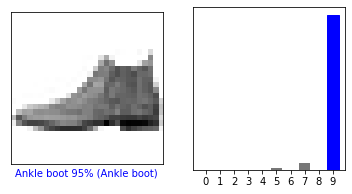

In [21]:
# the 0th image, predictions, and prediction array
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

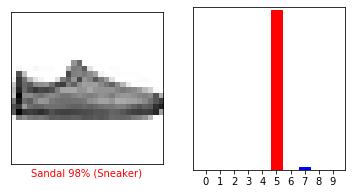

In [22]:
# Correct prediction labels are blue and incorrect prediction labels are red. 
# The number gives the percentage (out of 100) for the predicted label
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

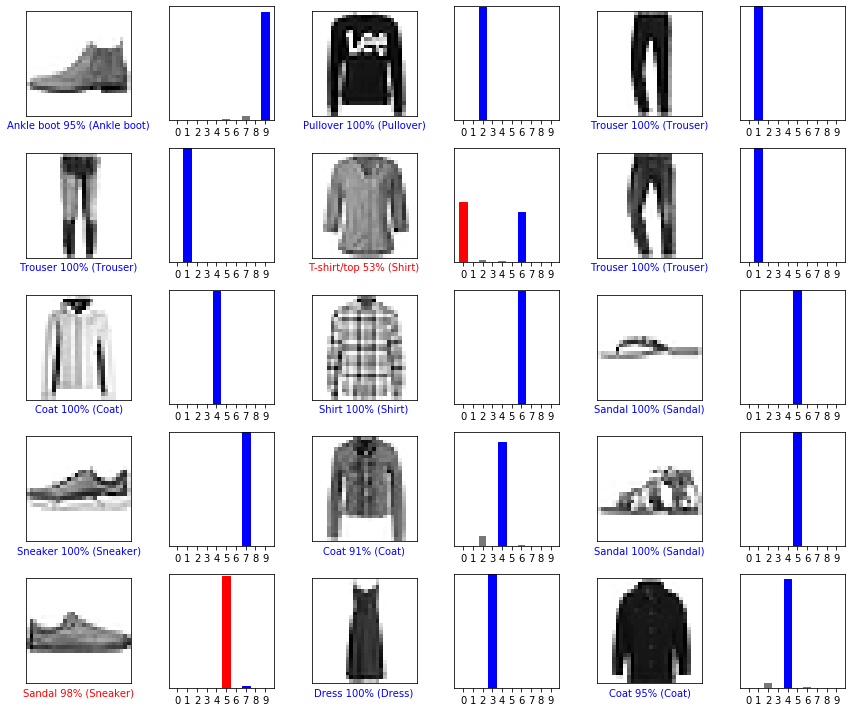

In [23]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [24]:
# Grab an image from the test dataset.
img = test_images[1]
print(img.shape)

(28, 28)


In [25]:
# tf.keras models are optimized to make predictions on a batch, or collection, of examples at once. 
# Accordingly, even though you're using a single image, you need to add it to a list

# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [26]:
# predict the correct label for this image
# model.predict returns a list of lists — one list for each image in the batch of data
predictions_single = model.predict(img)
print(predictions_single)

[[1.17500065e-04 1.31016156e-10 9.98184502e-01 1.10651319e-08
  1.53362285e-03 2.03603552e-08 1.64357902e-04 1.18045615e-13
  4.49646431e-10 4.66773421e-17]]


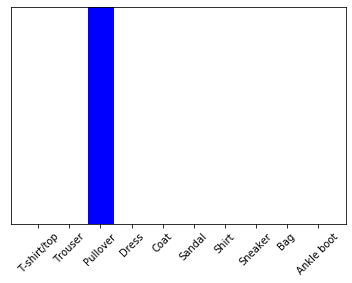

In [27]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [28]:
# Grab the predictions for our (only) image in the batch
np.argmax(predictions_single[0])

2